https://www.kaggle.com/srolka/ecommerce-customers

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Ecommerce Customers")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
from pandas_profiling import ProfileReport

In [6]:
profile = ProfileReport(df)

In [7]:
profile

In [8]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg._Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

In [9]:
X = df[['Avg._Session_Length', 'Time_on_App','Time_on_Website', 'Length_of_Membership']]
y = df['Yearly_Amount_Spent']

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
results = sm.OLS(y, X).fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly_Amount_Spent   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                 6.146e+04
Date:                 Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                         21:18:52   Log-Likelihood:                -2270.3
No. Observations:                  500   AIC:                             4549.
Df Residuals:                      496   BIC:                             4565.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg._Session_Length   

Nenhum item deve ser descartado analisando o P-valor

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
predictions = model.predict(X_test)

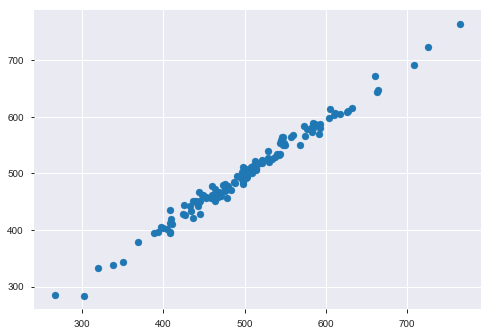

In [17]:
plt.scatter(y_test,predictions)

In [18]:
from sklearn.metrics import r2_score

In [19]:
score = r2_score(y_test, predictions)
print(score)

0.984659543194317


In [20]:
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
Avg._Session_Length,25.291884
Time_on_App,38.656916
Time_on_Website,0.666775
Length_of_Membership,61.174619


# Conclusão

Nosso modelo presenta uma boa relação linear. Analisando os coeficentes vemos que o aplicativo tem uma resposta melhor que o site. Dessa forma, deve-se investir mais no aplicativo do que no website.